In [2]:
import pandas as pd
import numpy as np

In [17]:
glass_data = pd.read_csv("Glass Identification.csv")
glass_data

,Ri,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [19]:
glass_data.shape

(214, 10)

In [20]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ri      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Ai      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [21]:
glass_data.describe()

,Ri,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Ri', ylabel='Na'>

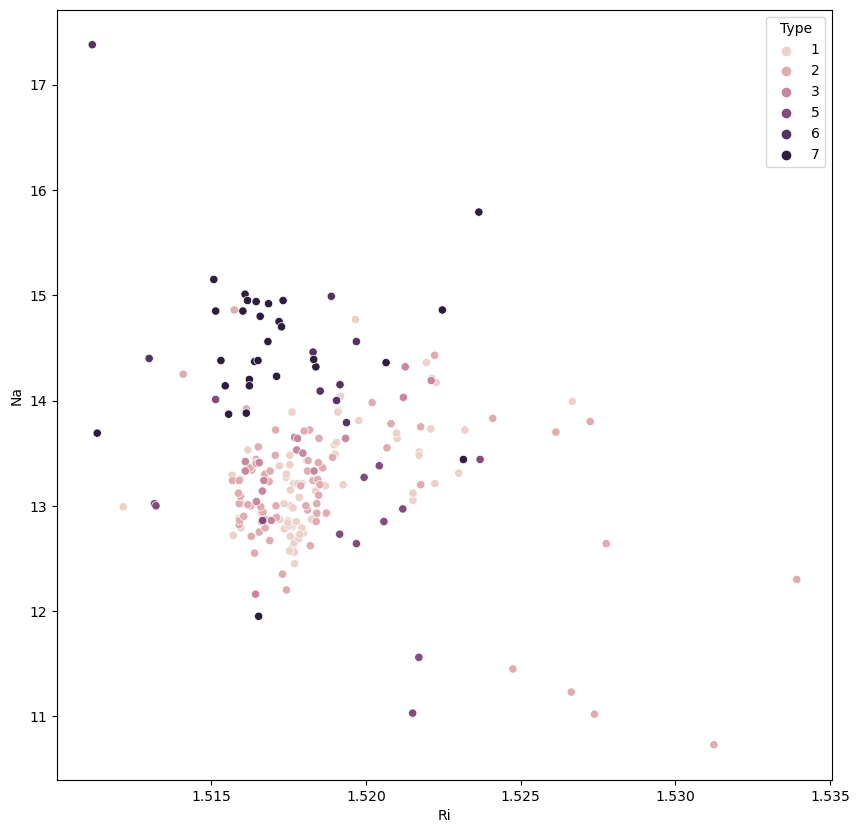

In [49]:
plt.subplots (figsize =(10,10))
sns.scatterplot(x='Ri' ,y='Na' ,hue='Type' , data=glass_data)

<Axes: xlabel='Mg', ylabel='Ai'>

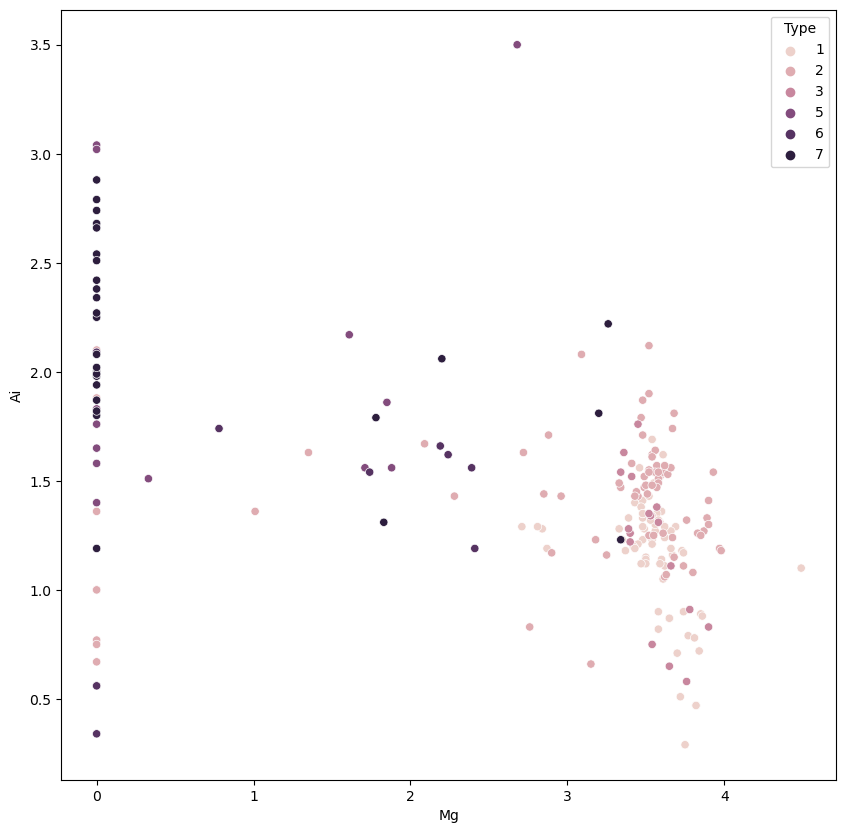

In [50]:
plt.subplots (figsize =(10,10))
sns.scatterplot(x='Mg' ,y='Ai' ,hue='Type' , data=glass_data)

<Axes: xlabel='Si', ylabel='K'>

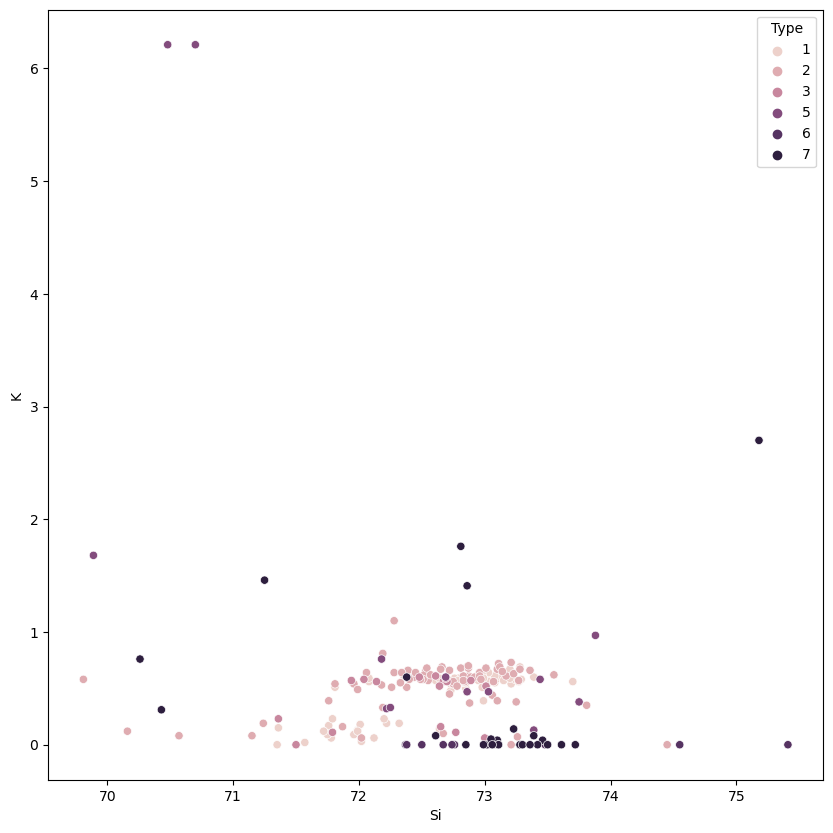

In [51]:
plt.subplots (figsize =(10,10))
sns.scatterplot(x='Si' ,y='K' ,hue='Type' , data=glass_data)

<Axes: xlabel='Ca', ylabel='Ba'>

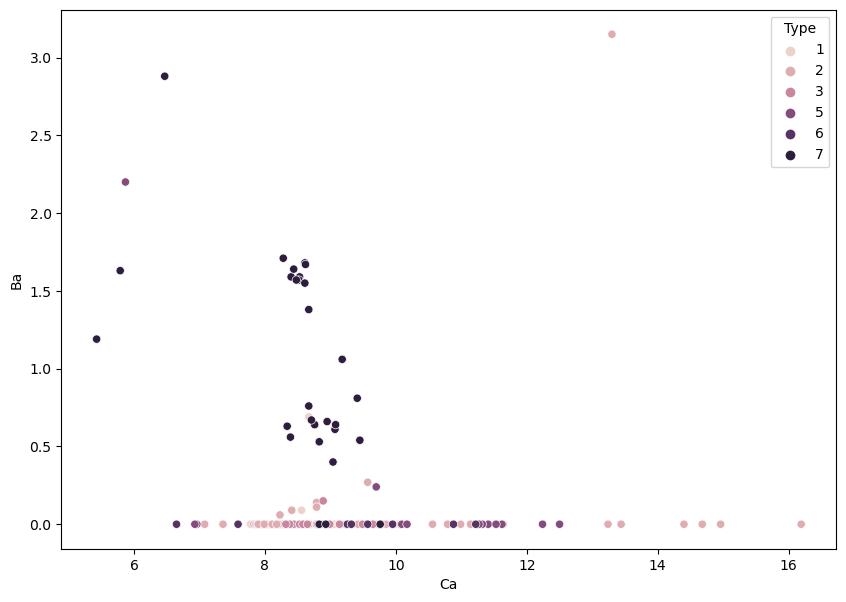

In [37]:
plt.subplots (figsize =(10,7))
sns.scatterplot(x='Ca' ,y='Ba' ,hue='Type' , data=glass_data)

<Axes: xlabel='Ai', ylabel='Ca'>

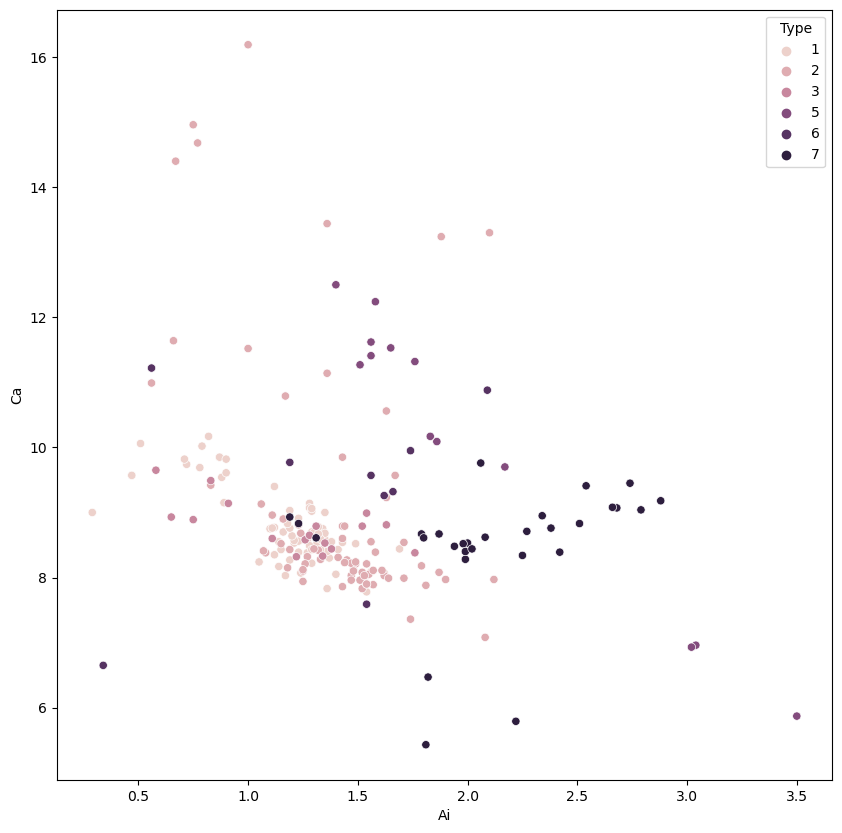

In [52]:
plt.subplots (figsize =(10,10))
sns.scatterplot(x='Ai' ,y='Ca' ,hue='Type' , data=glass_data)

<Axes: xlabel='Type', ylabel='Ai'>

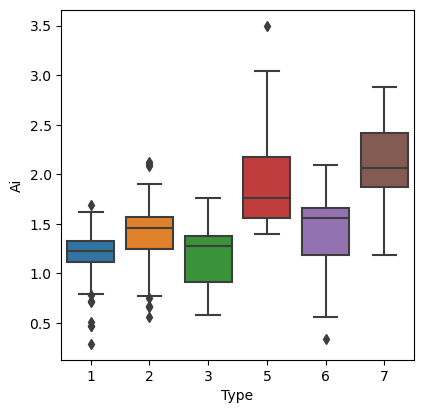

In [97]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot (x='Type' ,y='Ai' , data = glass_data)

<Axes: xlabel='Type', ylabel='Ba'>

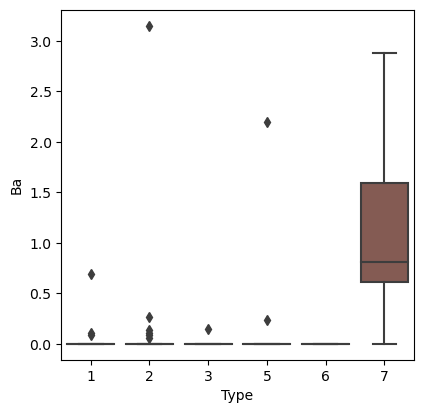

In [98]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.boxplot (x='Type' ,y='Ba' , data = glass_data)

<Axes: xlabel='Type', ylabel='Na'>

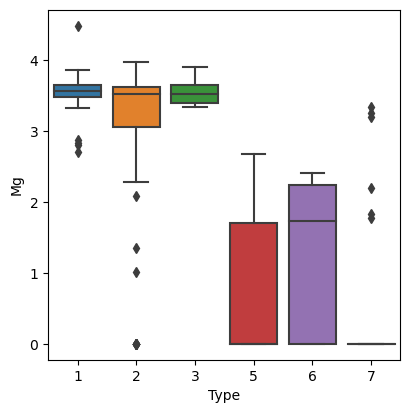

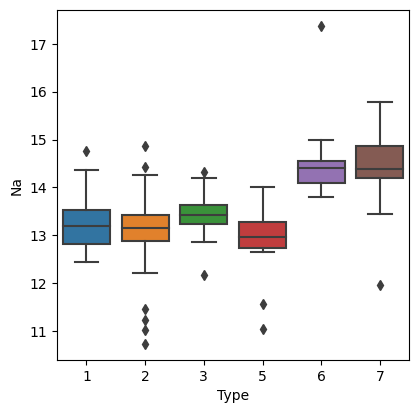

In [99]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.boxplot (x='Type' ,y='Mg' , data = glass_data)

plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.boxplot (x='Type' ,y='Na' , data = glass_data)



<Axes: >

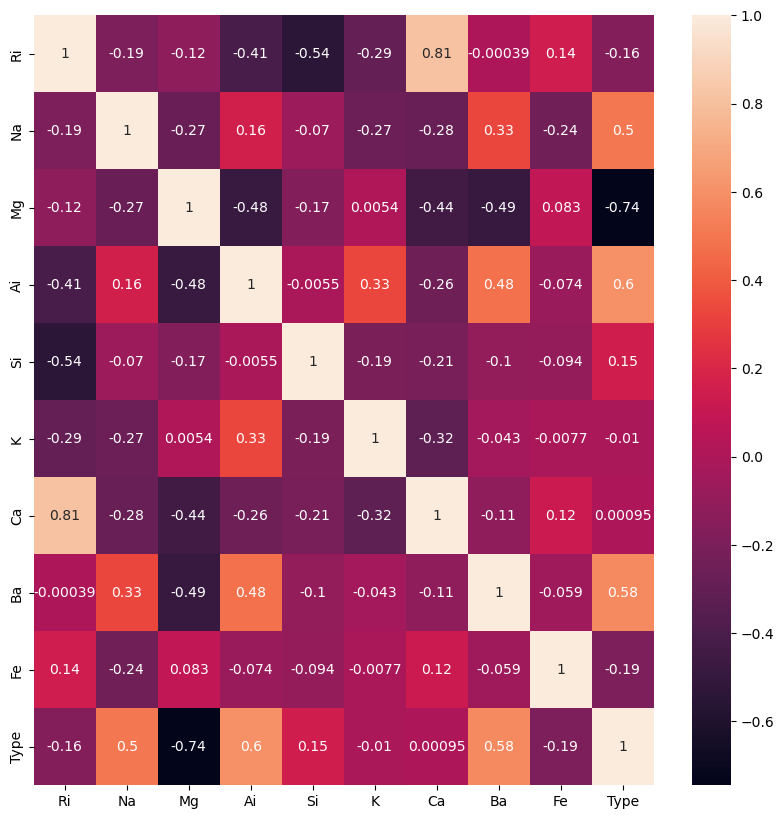

In [100]:
plt.subplots(figsize=(10,10))
sns.heatmap(glass_data.corr(),annot = True)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [102]:
x_data =glass_data.drop(['Type'], axis=1)
y_data=glass_data['Type'].values

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=.3,random_state=25)

In [104]:
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [105]:
d_tree = tree.DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
y_pred =d_tree.predict(x_test)
decision_tree =metrics.accuracy_score(y_pred,y_test)

In [106]:
pd.DataFrame([['Decision Tree',decision_tree]],columns=['Model', 'Accuracy'])

,Model,Accuracy
0,Decision Tree,0.646154


In [107]:
Rand_f = RandomForestClassifier(max_depth =3, min_samples_split=2, n_estimators =50, random_state=1)
Rand_f.fit(x_train,y_train)
y_pred =Rand_f.predict(x_test)
random_forest =metrics.accuracy_score(y_pred,y_test)

In [108]:
pd.DataFrame([['Random Forest',random_forest]],columns=['Model', 'Accuracy'])

,Model,Accuracy
0,Random Forest,0.738462


In [109]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred =svm.predict(x_test)
s_vector =metrics.accuracy_score(y_pred,y_test)

In [110]:
pd.DataFrame([['Support Vector Machines',s_vector]],columns=['Model', 'Accuracy'])

,Model,Accuracy
0,Support Vector Machines,0.384615


Text(98.22222222222221, 0.5, 'predicted label')

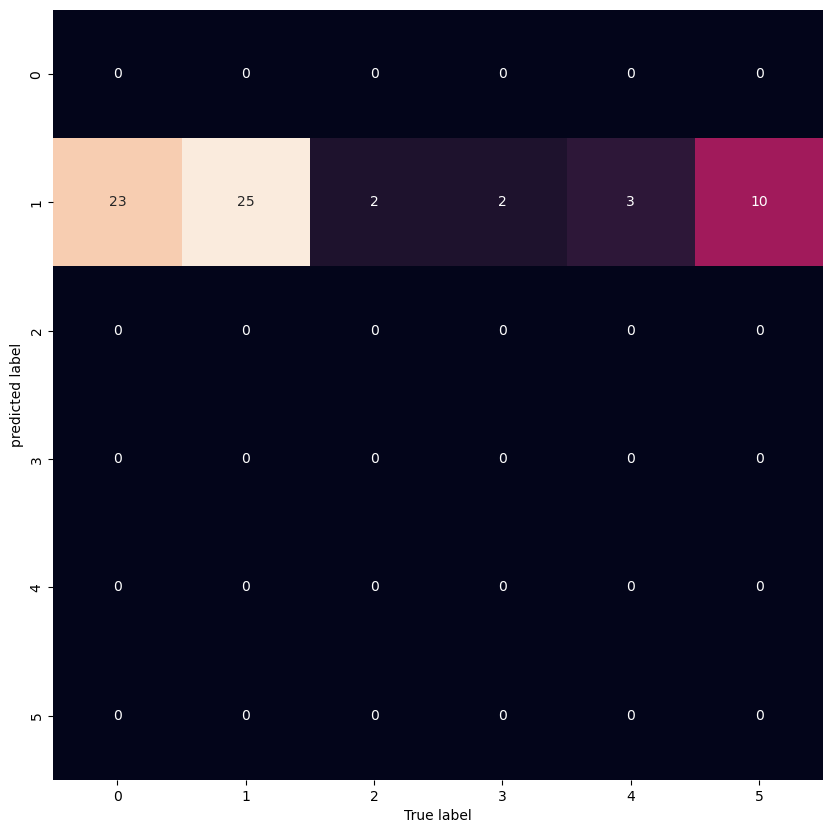

In [111]:
matrix =confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(10,10))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('predicted label')

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.38      1.00      0.56        25
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        10

    accuracy                           0.38        65
   macro avg       0.06      0.17      0.09        65
weighted avg       0.15      0.38      0.21        65



C:\Users\hp5cd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp5cd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp5cd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
